In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("anon_Admit_Report.csv", encoding="unicode_escape") #data set

In [104]:
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12647 entries, 0 to 12646
Data columns (total 45 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Applicant                                                                                                                           12647 non-null  int64  
 1   Application                                                                                                                         12647 non-null  int64  
 2   Created date                                                                                                                        12647 non-null  object 
 3   Submitted date                                                                   

In [ ]:
#df.drop(["Order ID", "unamed1"], axis=1, inplace=True) remove rows
pd.isnull(df).sum() 
null_counts = pd.isnull(df).sum()
print(null_counts.a)

Applicant                                                                                                                                 0
Application                                                                                                                               0
Created date                                                                                                                              0
Submitted date                                                                                                                            0
Offer type                                                                                                                                0
Offer course name                                                                                                                         0
Gender                                                                                                                                    0
Special needs       

In [ ]:

filtered_nulls = null_counts[null_counts < 500]

print(filtered_nulls)




In [106]:
# Find columns with > 500 nulls
null_counts = pd.isnull(df).sum()
cols_to_drop = null_counts[null_counts > 500].index

# Drop them from the dataset
df_dropped = df.drop(columns=cols_to_drop)
df_dropped = df.drop(columns=["Extra question: How did you hear about Ashesi? You can select all that apply to you:"])
df_dropped.shape
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12647 entries, 0 to 12646
Data columns (total 44 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Applicant                                                                                                                           12647 non-null  int64  
 1   Application                                                                                                                         12647 non-null  int64  
 2   Created date                                                                                                                        12647 non-null  object 
 3   Submitted date                                                                   

In [ ]:
df_dropped['Created date'] = pd.to_datetime(df_dropped['Created date']).dt.to_period('M')
df_dropped['Submitted date'] = pd.to_datetime(df_dropped['Submitted date']).dt.to_period('M')
# print(df_dropped['Created date'])


In [ ]:
df_dropped['Submitted date'] = pd.to_datetime(
    df_dropped['Submitted date'], errors='coerce'
).dt.to_period('M')
# df_dropped = df_dropped.drop(columns=["Extra question: How did you hear about Ashesi? You can select all that apply to you:"])
# print(df_dropped['Submitted date'])df_dropped['Created date'] = pd.to_datetime(df_dropped['Created date'], errors='coerce').dt.to_period('M')

In [13]:
print(df_dropped['Offer type'].unique())
# print(df_dropped['Offer type'])

['Failed' 'Withdrawn' 'Enrolled' 'Auto Deny' 'Admission Package'
 'Unreplied' 'Ready for committee' 'Positive Feedback'
 'Positive Feedback (Sep)']


In [30]:
print(df_dropped['Offer course name'].unique())
# print(df_dropped['Offer type'])

['[B.Sc.] Computer Science' '[B.Sc.] Management Information Systems'
 '[B.Sc.] Electrical/Electronic Engineering'
 '[B.Sc.] Computer Engineering' '[B.Sc.] Mechanical Engineering'
 '[B.Sc.] Business Administration' '[B.Sc.] Mechatronic Engineering'
 '[B.Sc.] Economics' '[LLB] Law with Public Policy']


In [31]:
print(df_dropped['Gender'].unique())

['M' 'F']


In [33]:
print(df_dropped['Education - Block 1: Level of education'].unique())

['SE' 'OQ' 'VO' 'BA' 'EX' nan]


In [ ]:
print(df_dropped['Language: native'].unique())

['ee' 'en' 'fat' 'yo' 'luo' 'ki' 'gaa' 'bfd' 'ak' 'so' 'ha' 'myv' 'tw'
 'rw' 'sn' 'bem' 'ig' 'fr' 'und' 'gn' 'tum' 'am' 'ny' 'byv' 'sw' 'ff' 'nd'
 'om' 'rwk' 'teo' 'nr' 'mul' 'ss' 'bas' 'man' 'ada' 'st' 'enm' 'zxx' 'af'
 'dje' 'nyo' 'ar' 'kfo' 'ach' 'bm' 'nzi' 'efi' 'dyo' 'fon' 'bum' 'wo'
 'mos' 'ab' 'dv' 'kpe' 'bkm' 'swc' 'mas' 'kam' 'mi' 'luy' 'idu' 'lg' 'nyn'
 'pt' 'ybb' 'men' 'zu' 'kln' 'nym' 'bg' 'dua' 'tog' 'eo' 'din' 'dzg' 'lag'
 'rn' 'yao' 'ksf' 'sid' 'mgo' 'ts' 'nus' 'dz' 'ln' 'frr' 'es' 'ibb' 'si'
 'wal' 'nnh' 'tiv' 've' 'ast' 'guz' 'ban' 'ace' 'jgo' 'lua' 'ang' 'xog'
 'loz' 'wae' 'dar' 'su' 'saq' 'yue' 'syc' 'ta' 'mni' 'tem' 'kr' 'bbj'
 'gur' 'tn' 'ti' 'kg' 'lu' nan 'mer' 'pcm' 'ebu' 'bax' 'lfn' 'kri']


In [116]:
mask = 'Extra question: Have you applied to Ashesi before? If "yes" indicate the year.'

no_entries = df_dropped.loc[
    df_dropped[mask]
    .str.contains(r'yes', case=False, na=False),
    mask
]
print(no_entries.unique())
print(len(no_entries.unique()))

['yes 2017' 'Yes, I have applied it last year 2017' 'yes, 2016'
 'Yes, 2017' 'Yes (AIX 2017)' 'Yes in 2017' 'Yes, in 2017' 'Yes 2017'
 'Yes, 2017.' 'Yes, 2016' 'Yes - 2016 and 2017' 'yes, in 2017.'
 'yes in 2017' 'Yes,2017' 'YES' 'Yes. 2017' 'Yes (2018)' 'YES (2018)'
 'Yes' 'Yes. 2018' 'Yes, 2018' 'Yes 2018'
 'Yes. In the year 2018 for the 2018 intake' 'yes(2018)' 'Yes/2018.'
 "Yes, 2018 session, but I didn't complete it." 'YES, 2018' 'yes 2018'
 'Yes in 2017 and 2018' 'Yes - 2018' 'Yes, in the year 2018' 'Yes(2018)'
 'yes in 2017 and 2018' 'yes - 2018' 'Yes, in 2018' 'Yes please (2018)'
 'Yes (2014)' 'Yes- 2018' 'Yes, I applied in 2018.' 'Yes  2017'
 'Yes,2017/2018 and 2018/2019' 'Yes  2018' 'Yes, 2017/2018 Academic Year'
 'Yes-2018' 'Yes: 2018' 'Yes. 2018.' 'yes, in 2018' 'yes, this year'
 'yes. 2018' 'Yes, 2018.' 'YES 2019' 'YES ,2018' 'Yes,2019' 'Yes, 2019'
 'Yes! 2019' 'Yes ,2019' 'Yes ; 2019' 'Yes (2019/2020)' 'Yes . 2019'
 'Yes, 2019/2020' 'Yes 2019'
 'Yes I have applied to Ashe

In [ ]:
mask = 'Extra question: Have any of your family members gained admission to Ashesi University?'

no_entries = df_dropped.loc[
    df_dropped[mask]
    .str.contains(r'', case=False, na=False),
    mask
]
print(no_entries.unique())
print(len(no_entries.unique()))

['No' 'Yes']
2


In [54]:
for x in filtered_nulls.index.tolist()[10:]:
    
    no_entries = df_dropped.loc[
    df_dropped[x]
    .str.contains(r'', case=False, na=False),
    x
]
    print(x + " - " + no_entries.unique())
    print(len(no_entries.unique()))

['Extra question: Have any of your family members gained admission to Ashesi University? - No'
 'Extra question: Have any of your family members gained admission to Ashesi University? - Yes']
2
['Extra question: Type of Exam - WASSCE - Ghana'
 "Extra question: Type of Exam - IGCSE 'A' Level"
 "Extra question: Type of Exam - GCE 'O' LEVEL"
 'Extra question: Type of Exam - Other Official Exam'
 'Extra question: Type of Exam - WASSCE - Ghana\nOther Official Exam'
 'Extra question: Type of Exam - WASSCE - Gambia'
 'Extra question: Type of Exam - High School Diploma\nOther Official Exam'
 'Extra question: Type of Exam - High School Diploma'
 "Extra question: Type of Exam - WASSCE - Ghana\nIGCSE 'A' Level"
 "Extra question: Type of Exam - IGCSE 'A' Level\nOther Official Exam"
 "Extra question: Type of Exam - IGCSE 'A' Level\nHigh School Diploma"
 "Extra question: Type of Exam - WASSCE - Sierra Leone\nIGCSE 'A' Level\nOther Official Exam"
 'Extra question: Type of Exam - International Baccala

In [70]:
# Replace 'wassce ghana' with 'WSCE GH' in the specified column
# df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace("IGCSE 'A' Level\nWASSCE - Nigeria", 'IGCSE A Level')
# df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace('High School Diploma', 'WASSCE - Ghana')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r'Other Official Exam\nWASSCE - Nigeria', 'WASSCE - Nigeria')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r'Other Official Exam\nWASSCE - Nigeria', 'WASSCE - Nigeria')
# df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace('International Baccalaureate (IB) Diploma', 'International Baccalaureate')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r'Other Official Exam\nWASSCE - Nigeria', 'WASSCE - Nigeria')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r"WASSCE - Sierra Leone\nIGCSE 'A' Level\nOther Official Exam", 'WASSCE - Sierra Leone')
df_dropped['Extra question: Type of Exam'] = df_dropped['Extra question: Type of Exam'].replace(r"International Baccalaureate (IB) Diploma\nHigh School Diploma\nOther Official Exam",'International Baccalaureate')


In [101]:
# Collapse similar entries in 'Extra question: Type of Exam'
# Replace any cell containing 'International Baccalaureate' with 'International Baccalaureate'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('International Baccalaureate', case=False, na=False), 'Extra question: Type of Exam'] = 'International Baccalaureate'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("High School Diploma", case=False, na=False), 'Extra question: Type of Exam'] = "WASSCE - Ghana"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("IGCSE A Level", case=False, na=False), 'Extra question: Type of Exam'] = "IGCSE 'A' Level"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains("WASSCE - Gambia", case=False, na=False), 'Extra question: Type of Exam'] = "WASSCE - Gambia"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('Other Official Exam', case=False, na=False), 'Extra question: Type of Exam'] = "IGCSE 'A' Level"
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('WASSCE - Liberia', case=False, na=False), 'Extra question: Type of Exam'] = 'WASSCE - Liberia'
df_dropped.loc[df_dropped['Extra question: Type of Exam'].str.contains('WASSCE - Nigeria', case=False, na=False), 'Extra question: Type of Exam'] = 'WASSCE - Nigeria'

In [83]:
print(df_dropped['Extra question: Type of Exam'].unique())

['WASSCE - Ghana' "IGCSE 'A' Level" "GCE 'O' LEVEL" 'WASSCE - Gambia'
 'WASSCE - Sierra Leone' 'International Baccalaureate' 'WASSCE - Nigeria'
 'WASSCE - Liberia' nan]


In [109]:
print(df_dropped)

       Applicant  Application Created date Submitted date Offer type  \
0            557          470      2018-01        2018-02     Failed   
1            566          473      2018-01            NaT     Failed   
2            569          479      2018-01            NaT     Failed   
3            572          482      2018-01            NaT     Failed   
4            575          485      2018-01            NaT     Failed   
...          ...          ...          ...            ...        ...   
12642      57326        40098      2024-12            NaT     Failed   
12643      57346        40110      2024-12            NaT     Failed   
12644      57347        40111      2024-12            NaT     Failed   
12645      57348        40112      2024-12            NaT     Failed   
12646      57349        40113      2024-12        2025-02     Failed   

                               Offer course name Gender  Special needs  \
0                       [B.Sc.] Computer Science      M      

In [111]:
print(df_dropped['Submitted date'].unique())

<PeriodArray>
['2018-02',     'NaT', '2018-04', '2018-07', '2018-01', '2018-03', '2018-11',
 '2018-09', '2018-05', '2018-12', '2018-10', '2018-08', '2018-06', '2019-12',
 '2019-11', '2019-03', '2019-05', '2019-06', '2019-04', '2019-10', '2019-07',
 '2019-09', '2019-02', '2019-01', '2019-08', '2020-07', '2020-02', '2020-05',
 '2020-12', '2020-09', '2020-01', '2020-11', '2020-06', '2020-10', '2020-04',
 '2020-03', '2020-08', '2021-03', '2021-12', '2021-10', '2021-04', '2021-09',
 '2021-06', '2021-11', '2021-07', '2021-01', '2021-08', '2021-02', '2022-04',
 '2021-05', '2022-11', '2022-03', '2022-07', '2022-09', '2022-02', '2022-06',
 '2022-05', '2022-01', '2022-10', '2022-08', '2022-12', '2023-03', '2023-02',
 '2023-05', '2023-08', '2023-12', '2023-01', '2023-09', '2023-04', '2023-11',
 '2024-06', '2023-06', '2024-01', '2023-10', '2024-03', '2023-07', '2024-08',
 '2024-02', '2024-09', '2024-11', '2024-04', '2025-04', '2024-07', '2024-05',
 '2024-10', '2025-02', '2025-05', '2025-06', '2024

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def describe_and_plot(series: pd.Series, title="Series Analysis"):
    """
    Takes a pandas Series and:
    - If numeric → histogram
    - If categorical → bar chart
    - Prints summary stats (mean, median, mode, std, variance)
    """
    # Drop NA for cleaner analysis
    s = series.dropna()
    
    # Check if numeric
    if pd.api.types.is_numeric_dtype(s):
        # Plot histogram
        plt.figure(figsize=(6,4))
        plt.hist(s, bins=10, color="skyblue", edgecolor="black")
        plt.title(f"{title} (Histogram)")
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.show()
        
        # Stats
        print("📊 Numeric Summary:")
        print(f"Mean      : {s.mean():.2f}")
        print(f"Median    : {s.median():.2f}")
        print(f"Mode      : {s.mode().values}")
        print(f"Std Dev   : {s.std():.2f}")
        print(f"Variance  : {s.var():.2f}")
    
    else:
        # Plot bar chart
        counts = s.value_counts()
        plt.figure(figsize=(6,4))
        counts.plot(kind="bar", color="orange", edgecolor="black")
        plt.title(f"{title} (Bar Chart)")
        plt.xlabel("Categories")
        plt.ylabel("Count")
        plt.show()
        
        # Stats
        print("📊 Categorical Summary:")
        print(f"Mode (Most Frequent) : {s.mode().values}")
        print(f"Unique Categories    : {s.nunique()}")
        print(f"Total Count          : {s.count()}")


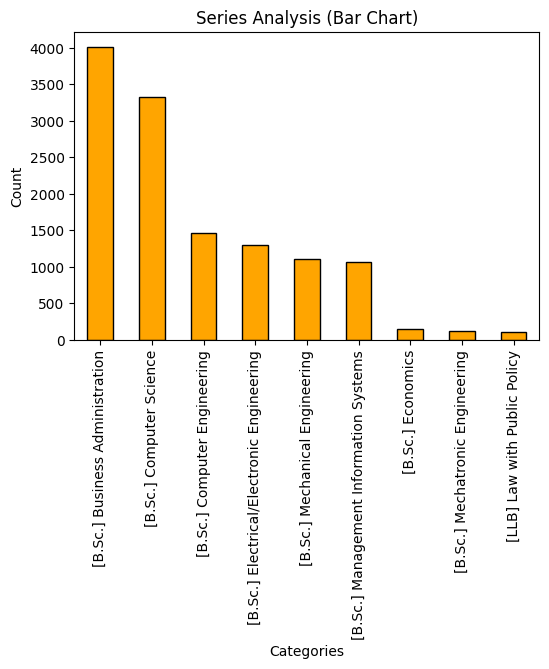

📊 Categorical Summary:
Mode (Most Frequent) : ['[B.Sc.] Business Administration']
Unique Categories    : 9
Total Count          : 12647


In [115]:

describe_and_plot(df_dropped['Offer course name'])
